#### **Import modules**

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

#### **Import data** 

In [3]:
df = pd.read_csv("processed.cleveland.data", header=None)

'''
By default the first row is read as header! 
     63.0  1.0  1.0.1  145.0  233.0  1.0.2  2.0  150.0  0.0  2.3  3.0 0.0.1  \
0    67.0  1.0    4.0  160.0  286.0    0.0  2.0  108.0  1.0  1.5  2.0   3.0   
1    67.0  1.0    4.0  120.0  229.0    0.0  2.0  129.0  1.0  2.6  2.0   2.0 
'''

'\nBy default the first row is read as header! \n     63.0  1.0  1.0.1  145.0  233.0  1.0.2  2.0  150.0  0.0  2.3  3.0 0.0.1  0    67.0  1.0    4.0  160.0  286.0    0.0  2.0  108.0  1.0  1.5  2.0   3.0   \n1    67.0  1.0    4.0  120.0  229.0    0.0  2.0  129.0  1.0  2.6  2.0   2.0 \n'

Investigate the first five rows of **df** via `head()` function:

In [4]:
# print the first five rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Instead of column names, df contains only column numbers. From UCI Machine Learning Repositary, we got the column names:
* **age**,
* **sex**,
* **cp**, chest pain
* **restbp**, resting blood pressure (in mm Hg)
* **chol**, serum cholesterol in mg/dl 
* **fbs**, fasting blood sugar
* **restecg**, resting electrocardiographic results
* **thalach**, maximum heart rate achieved
* **exang**, exercise induced angina
* **oldpeak**, ST depression induced by exercise relative to rest
* **slope**, the slope of the peak exercise ST segment
* **ca**, number of major vessels(0-3) colored by fluoroscopy
* **thal**, this is short of thalium heart scan
* **hd**, diagnosis of heart disease, the predicted attribute

In [5]:
# Change the column numbers to column names
df.columns = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


---

#### **Deal with Missing Data**

##### Identifying Missing Data

In [6]:
# Start with investigating the data types
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

Results shows that there are three datatypes, `float64`, `object` and `int64`. `Object` datatypes represents a mixture of things, like letters and numbers. However, **ca** and **thal** should only contain several values representing different categories. 

Hence, find out what's going on via unique values of both **ca** and **thal**.

In [7]:
# print out unique value of column 'ca' and 'thal'.
df['ca'].unique()
df['thal'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

array(['6.0', '3.0', '7.0', '?'], dtype=object)

Results show that both **ca** and **thal** contain a mixture of numbers and a question mark(?), which indicates missing values. 


##### Handling Missing Data

Note that scikit-learn's classification trees do not support datasets with missing values, so we need to remove or replace them. Let's start with finding numbers of missing value. 

In [8]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

6

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [9]:
len(df)
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])/len(df)

303

0.019801980198019802

Only 0.0198% contains missing values, which is 6/303. There is still 303 - 6 = 297 data left to build classification tree. It is more than enough, so just remove the 6 rows of data. 

In [10]:
new_df = df.loc[(df['ca']!='?') & (df['thal']!='?')]

Double check **new_df** doesn't contain missing values

In [11]:
len(new_df)
new_df['ca'].unique()
new_df['thal'].unique()

297

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

array(['6.0', '3.0', '7.0'], dtype=object)

Note that **ca** and **thal** still remain `object` datatypes. However, this doesn't affect us to make **Classification Tree**.

---

#### **Split Data into Dependent and Independent Variables**

In [12]:
x_var = new_df.drop('hd', axis= 1).copy()
# alternatively: x = new_df.iloc[:,:-1]
x_var.head()

y_var = new_df['hd'].copy()
y_var.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

Note that **x_var** is used to make predictions and **y_var** is the prediction results.

---

#### **One-Hot Encoding**

* age, **Float**
* sex, **Categorical** 
    * 0 = female
    * 1 = male
*  cp, chest pain type, **Categorical**
    * 1: typical angina
    * 2: atypical angina
    * 3: non-anginal pain
    * 4: asymptomatic
* restbp, resting blood pressure, **Float**
* chol, serum cholestoral in mg/dl, **Float**
* fbs, fasting blood sugar, **Float** 
    * 0: (< 120 mg/dl)
    * 1: (>= 120 mg/dl)
* restecg, resting electrocardiographic results, **Categorical**
    * 0: normal
    * 1: having ST-T wave abnormality 
    * 2: showing probable or definite left ventricular hypertrophy
* thalach, maximum heart rate achieved, **Float**
* exang, exercise induced angina, **Categorical**
    * 0: no
    * 1: yes
* oldpeak, ST depression induced by exercise relative to rest, **Float**
* slope, the slope of the peak exercise ST segment, **Categorical**
    * 1: upsloping
    * 2: flat
    * 3: downsloping
* ca, number of major vessels (0-3) colored by flourosopy, **Float**
* thal, thalium heart scan, **Categorical**
    * 3 = normal
    * 6 = fixed defect
    * 7 = reversable defect




In [13]:
x_var.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

From above, **age**, **restbp**, **chol** and **thalach** are `float64` datatypes, which are correct. However, the remainings should be `categorical`!  **BUT!!!**  **scikit-learn Decision Trees** natively only support continuous data. It doesn't feasible for categorical data like **cp**, that has 4 categories. 
In order to implement categorical data, we need to perform **One-Hot Encoding**, to convert a column of categorical data into multiple columns of binary values. 

In [14]:
# Make sure the dataset doesn't contain other random inputs!!!
x_var['cp'].unique()
x_var['restecg'].unique()
x_var['slope'].unique()
x_var['thal'].unique()
x_var['sex'].unique()
x_var['fbs'].unique()
x_var['exang'].unique()

array([1., 4., 3., 2.])

array([2., 0., 1.])

array([3., 2., 1.])

array(['6.0', '3.0', '7.0'], dtype=object)

array([1., 0.])

array([1., 0.])

array([0., 1.])

Construct dummy variables for categorical data which has more than 2 categories.

In [15]:
x_encoded = pd.get_dummies(x_var, columns=['cp', 'restecg', 'slope', 'thal'])
x_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


y_var equals to zero indicates that ones doesn't has heart disease. On the other hand, 1-4 is the severity of heart disease. However, we make a simple classification tree only, which predict a person has heart disease or not.

In [16]:
# Make sure y_var contains only 0,1,2,3,4
y_var.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [17]:
# Turns 1-4 into 1
y_var[y_var > 0] = 1
y_var.unique()
y_var.head()

array([0, 1], dtype=int64)

0    0
1    1
2    1
3    0
4    0
Name: hd, dtype: int64

---

### Mutual Information Feature Selection

Feature Importance using mutual information feature selection
age: 0.000000
sex: 0.066704
restbp: 0.000000
chol: 0.052636
fbs: 0.000000
thalach: 0.056510
exang: 0.092767
oldpeak: 0.071152
ca: 0.136638
cp_1.0: 0.000000
cp_2.0: 0.041394
cp_3.0: 0.000000
cp_4.0: 0.147406
restecg_0.0: 0.069342
restecg_1.0: 0.000000
restecg_2.0: 0.000000
slope_1.0: 0.045374
slope_2.0: 0.061875
slope_3.0: 0.000000
thal_3.0: 0.123267
thal_6.0: 0.000000
thal_7.0: 0.084867


<Figure size 2500x800 with 0 Axes>

<BarContainer object of 22 artists>

Text(0.5, 1.0, 'Feature Importance using Mutual Information Feature Selection')

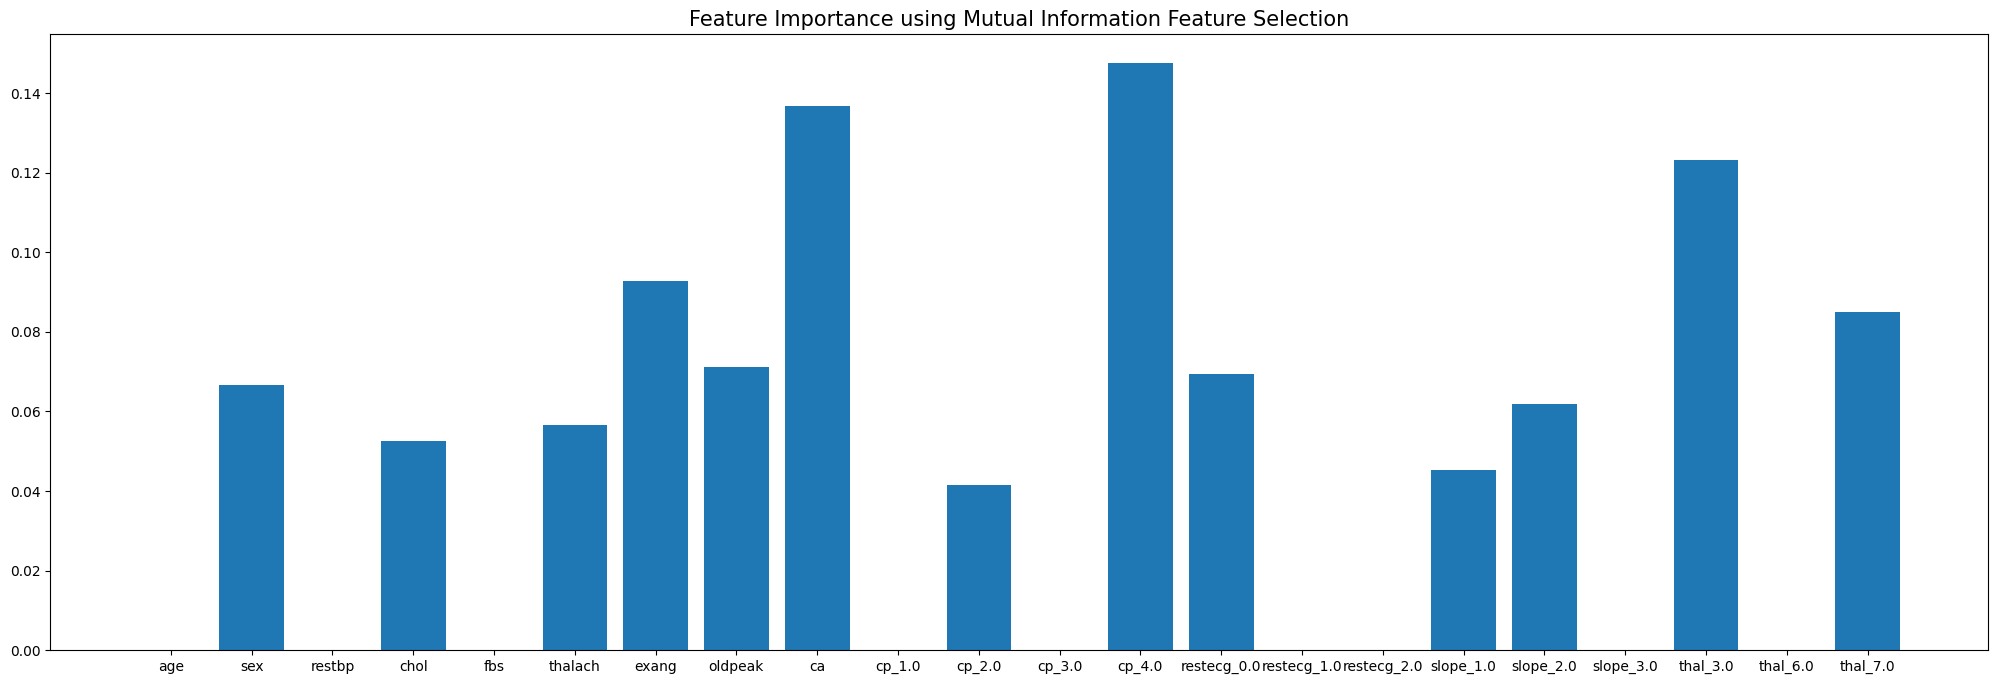

In [22]:
# Mutual Information Feature Selection

# feature selection
def select_features(x_train, y_train, x_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(x_train, y_train)
	x_train_fs = fs.transform(x_train)
	x_test_fs = fs.transform(x_test)
	return x_train_fs, x_test_fs, fs


# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_var, test_size = 0.3, random_state= 39) 

# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features

Xarray = ['age','sex','restbp','chol','fbs','thalach','exang','oldpeak','ca','cp_1.0','cp_2.0','cp_3.0','cp_4.0','restecg_0.0',	'restecg_1.0','restecg_2.0','slope_1.0','slope_2.0','slope_3.0','thal_3.0','thal_6.0','thal_7.0']

print("Feature Importance using mutual information feature selection")
for i in range(len(fs.scores_)):
	print(Xarray[i]+': %f' % ( fs.scores_[i]))
# plot the scores
plt.figure(figsize=(25,8))
plt.bar([Xarray[i] for i in range(len(fs.scores_))], fs.scores_)
plt.title("Feature Importance using Mutual Information Feature Selection", fontsize=15)
plt.show()

As seen from the above bar plot, we can exclude **age, restbp, and tbs** from our x variables due to its zero values in importance.

---

### Model 1: Decision Tree Classifier 

#### **Preliminary Classification Tree**

In [24]:
# Drop age, restbp and fbs from x_encoded
x_encoded2 = x_encoded.drop(['age', 'restbp', 'fbs'], axis=1)

# Split the data into trainset and testset
x_train, x_test, y_train, y_test = train_test_split(x_encoded2, y_var, test_size = 0.3, random_state= 3031) 

# Create decision tree
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

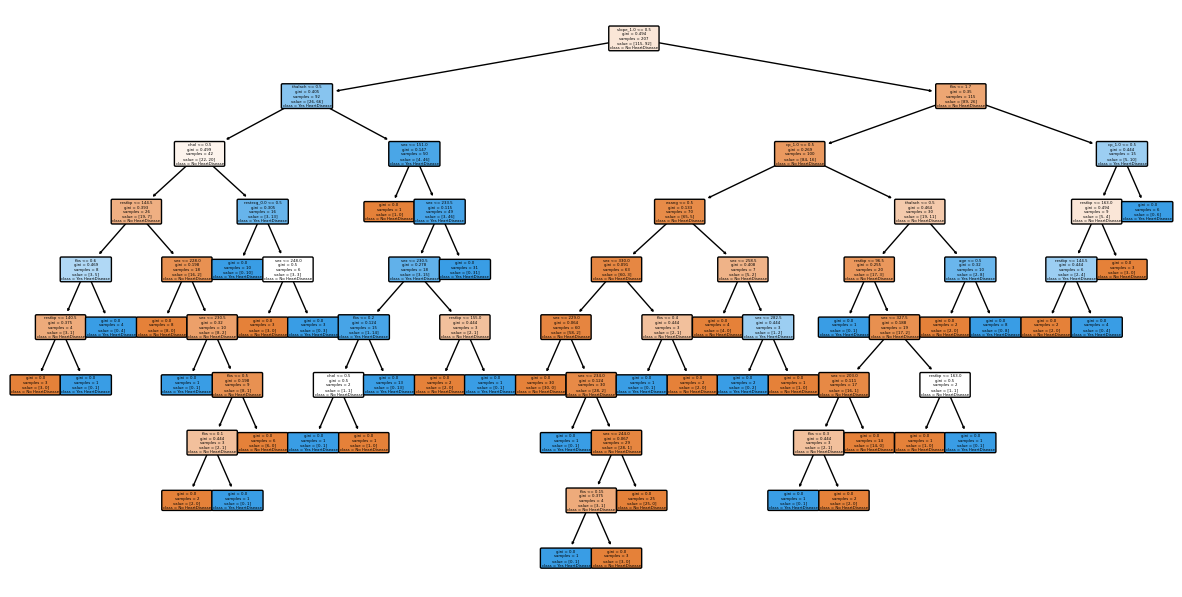

In [25]:
# Visualise decision tree
plt.figure(figsize=(15, 7.5))
plot_tree(tree, filled = True, rounded = True, class_names = ['No HeartDisease', 'Yes HeartDisease'], feature_names = x_encoded.columns);

Use testset to determine how decision tree perform and draw confusion matrix.

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


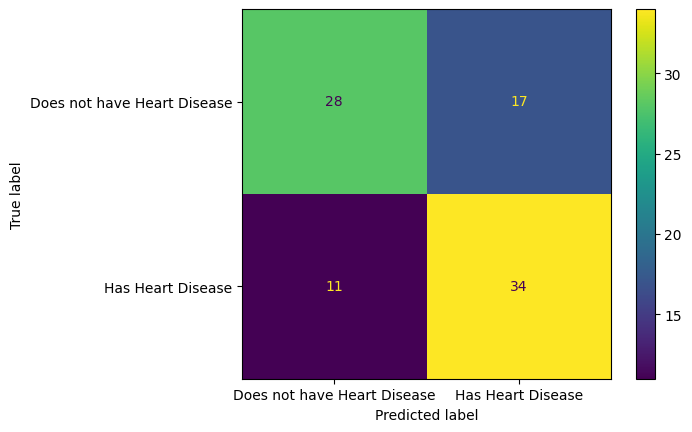

In [26]:
plot_confusion_matrix(tree, x_test, y_test, display_labels= ['Does not have Heart Disease','Has Heart Disease'])

From the confusion matrix, **28 + 17 = 45** people that did not have **Heart Disease**, `28( 28/45 = 62.22%)` were correctly classified. On the other hand, **11 + 34 = 45** people that have **Heart Disease**, `34( 34/45 = 75.56%)` were correctly classified.
One reason that holding this **Classification Tree** back is **`overfit`** of the training dataset. In order to address **overfitting problem**, we perform **pruning** to optimize our results. 

---

#### **Cost Complexity Pruning** 

##### Visualising Alpha

In [27]:
# Determine the values for alpha
path = tree.cost_complexity_pruning_path(x_train, y_train)
# Extract different values for alpha
ccp_alphas = path.ccp_alphas
# Exclude the maximum value for alpha
ccp_alphas = ccp_alphas[:-1]

# Create an array to put decision trees into
trees = []

# Create decision tree for every single value of alpha and store it in the array
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    tree.fit(x_train, y_train)
    trees.append(tree)

DecisionTreeClassifier(random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0042941492216854536, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.004322400203407068, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.004508856682769727, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.004600874166091559, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.005751092707614446, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.006064390329400681, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.00644122383252818, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.007246376811594203, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.0073480803457920164, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.008344671201814056, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.008588298443370909, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.01073537305421363, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.010869565217391304, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.01177536231884058, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.014131467030017754, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.015458937198067629, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.02244996549344376, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.028244501070588027, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.03235174683189804, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.043439453496164265, random_state=0)

Plot the accuracy vs alphas graph to see which point of alpha has the maximum accuracy for both the datasets.

Text(0.5, 0, 'Alpha')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy vs Alpha for training and testing sets')

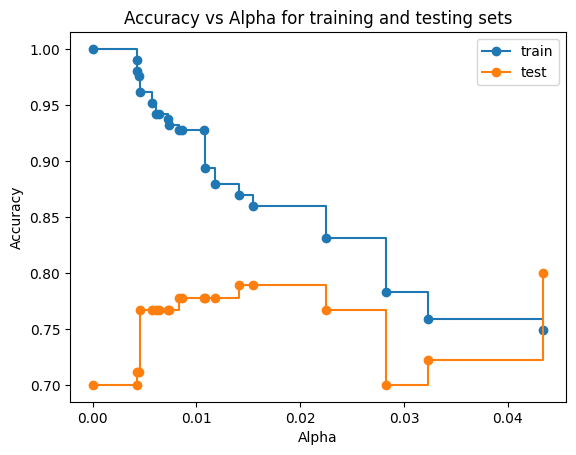

In [28]:
# Find the adjusted R-squares to see the model fit.
train_scores = [tree.score(x_train,y_train) for tree in trees]
test_scores = [tree.score(x_test,y_test) for tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

From the graph above, accuracy for Testing Dataset hits the peak value at **`alpha = 0.015`**. After this value, the accuracy drops off and we can strongly argue that **`ccp_alpha = 0.015`**.


##### Cross Validation for Finding the Best Alpha

Although the graph plotted above suggested the best value of alpha is 0.015, there might be another optimal value suggested by another set of data. 
First, desmonstrate that different training and testing datasets result in trees with different accuracies when **`ccp_alpha = 0.015`**. We will execute 10-fold cross validation to prove this:

<AxesSubplot: xlabel='Tree'>

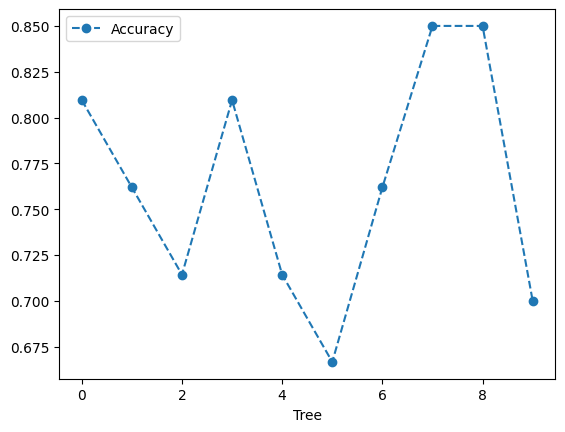

In [34]:
tree = DecisionTreeClassifier(random_state = 3031, ccp_alpha = 0.02)

scores = cross_val_score(tree, x_train, y_train, cv = 10)
df2 = pd.DataFrame(data={'Tree': range(10), 'Accuracy': scores})

df2.plot(x='Tree', y='Accuracy', marker = 'o', linestyle='--')

The graph above shows that **training** and **testing** data is sensitive to the datasets too. We will use **cross validation** to find the optimal value for `ccp_alpha`.

<AxesSubplot: xlabel='alpha'>

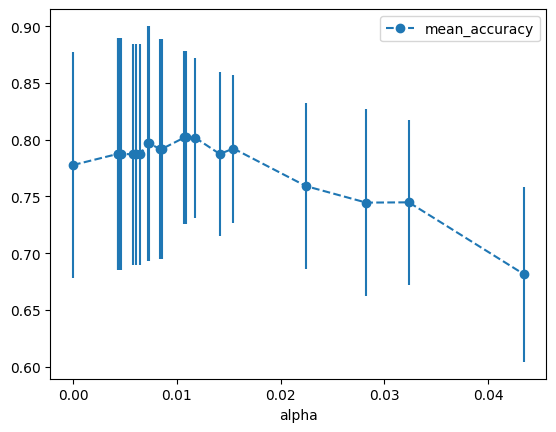

In [35]:
alpha_loop_values = []

# We will run each candidate value of alpha with 10-fold cross validation this time!
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(tree, x_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

# for each alpha, draw a graph of means and standard deviations of scores
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker = 'o', linestyle = '--')

Via **cross validation**, instead of `ccp_alpha=0.015`, the optimal value should be closer to `0.01`. Find the exact value:

In [37]:
alpha_results[(alpha_results['alpha']>0.01) & (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
12,0.010735,0.801905,0.076315
13,0.010870,0.801905,0.076315
14,0.011775,0.801667,0.070277
15,0.014131,0.787381,0.072045


So, the optimized value should be `ccp_alpha=0.010870`. Store the value to `ideal_ccp_alpha`

In [38]:
# Store the result
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.0108) & (alpha_results['alpha']<0.011)]['alpha']

# Convert ideal_ccp_alpha into float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.010869565217391304

---

#### **Build the Final Classification Tree**

DecisionTreeClassifier(ccp_alpha=0.010869565217391304, random_state=3031)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.893719806763285

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7777777777777778



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


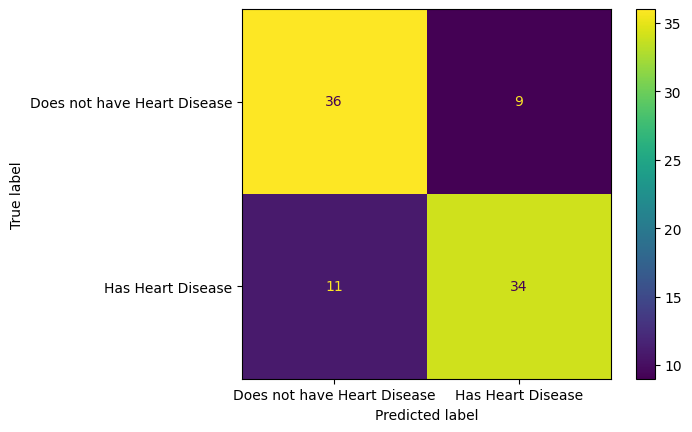

In [47]:
pruned_tree = DecisionTreeClassifier(random_state=3031, ccp_alpha = ideal_ccp_alpha)
pruned_tree.fit(x_train, y_train)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", pruned_tree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", pruned_tree.score(x_test, y_test))
print()

#Plot the confusion matrix of train set and test set
plot_confusion_matrix(pruned_tree, x_test, y_test, display_labels= ['Does not have Heart Disease','Has Heart Disease' ])

From the confusion matrix, **36 + 9 = 45** people that did not have **Heart Disease**, `36( 36/45 = 80%)` were correctly classified. On the other hand, **11 + 34 = 45** people that have **Heart Disease**, `34( 34/45 = 75.56%)` were correctly classified. 
In conclusion, accuracy for did not have **Heart Disease** increases by **80% - 62.22% = 17.78%** and accuracy for have **Heart Disease** maintains at **75.56%**. Hence, it is proven that pruned decision tree is more accurate than the previous one.  

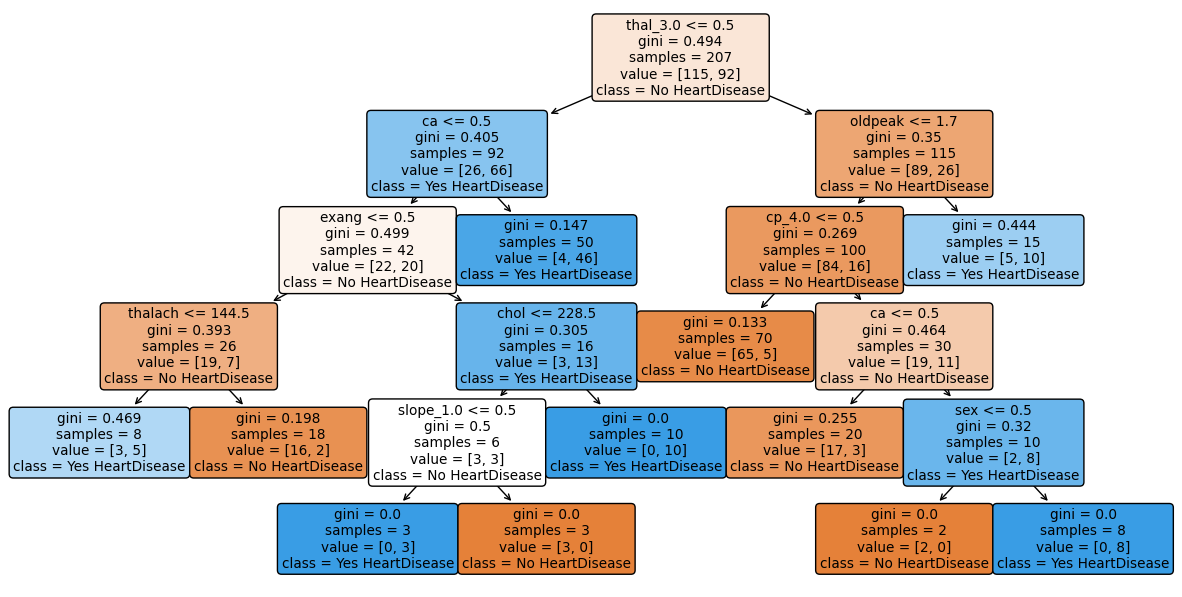

In [41]:
plt.figure(figsize=(15,7.5))
plot_tree(pruned_tree, filled = True, rounded = True,  class_names = ['No HeartDisease', 'Yes HeartDisease'], feature_names = x_encoded2.columns);

---

### Model 2: Logistic regression model

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy:  0.8888888888888888
Mean Squared Error(MSE):  0.1111111111111111

Goodness of Fit of Model 	Test Dataset
Classification Accuracy:  0.8
Mean Squared Error(MSE):  0.2



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


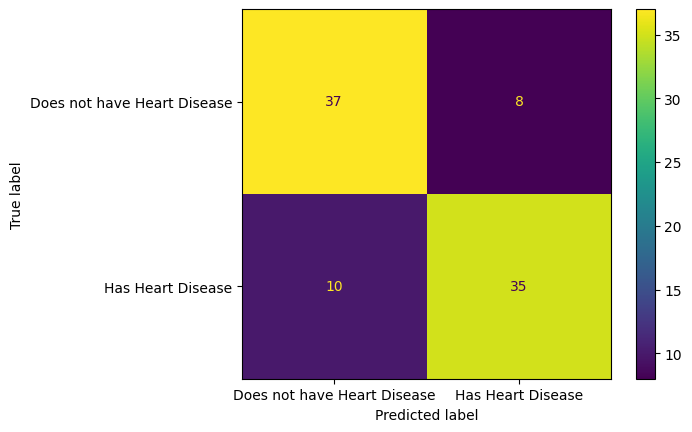

In [43]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

#Check the goodness of fit of the data
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy: ", logreg.score(x_train,y_train))
print("Mean Squared Error(MSE): ", mse(y_train,y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy: ", logreg.score(x_test,y_test))
print("Mean Squared Error(MSE): ", mse(y_test,y_test_pred))
print()

#Plot the confusion matrix of train set and test set
plot_confusion_matrix(logreg, x_test, y_test, display_labels= ['Does not have Heart Disease','Has Heart Disease' ])


From the confusion matrix, **37 + 8 = 45** people that did not have **Heart Disease**, `37( 37/45 = 82.22%)` were correctly classified. On the other hand, **10 + 35 = 45** people that have **Heart Disease**, `35( 35/45 = 77.78%)` were correctly classified. 
In conclusion, accuracy is high and result of logistic regression is satisfying.

---

### Model 3: Random Forest classifier model

RandomForestClassifier(n_estimators=10, random_state=3031)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy:  0.9855072463768116
Mean Squared Error(MSE):  0.014492753623188406

Goodness of Fit of Model 	Test Dataset
Classification Accuracy:  0.8111111111111111
Mean Squared Error(MSE):  0.18888888888888888



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


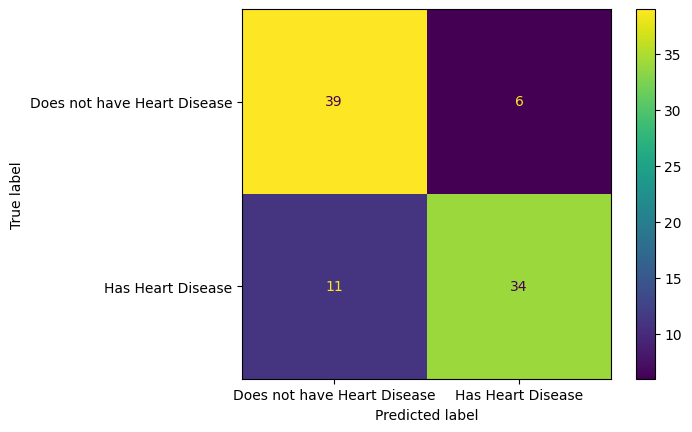

In [44]:
rfclf = RandomForestClassifier(n_estimators=10, random_state=3031)
rfclf.fit(x_train, y_train)

y_train_pred = rfclf.predict(x_train)
y_test_pred = rfclf.predict(x_test)

#Check the goodness of fit of the data
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy: ", rfclf.score(x_train,y_train))
print("Mean Squared Error(MSE): ", mse(y_train,y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy: ", rfclf.score(x_test,y_test))
print("Mean Squared Error(MSE): ", mse(y_test,y_test_pred))
print()

#Plot the confusion matrix of train set and test set
plot_confusion_matrix(rfclf, x_test, y_test, display_labels= ['Does not have Heart Disease','Has Heart Disease' ])

From the confusion matrix, **39 + 6 = 45** people that did not have **Heart Disease**, `39( 39/45 = 86.67%)` were correctly classified. On the other hand, **11 + 34 = 45** people that have **Heart Disease**, `34( 34/45 = 75.56%)` were correctly classified. 
In conclusion, accuracy is high and result of random forest classifier is satisfying.

---

### Model 4: Support Vector Machine Classification Model

SVC()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy:  0.6521739130434783
Mean Squared Error(MSE):  0.34782608695652173

Goodness of Fit of Model 	Test Dataset
Classification Accuracy:  0.5888888888888889
Mean Squared Error(MSE):  0.4111111111111111



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


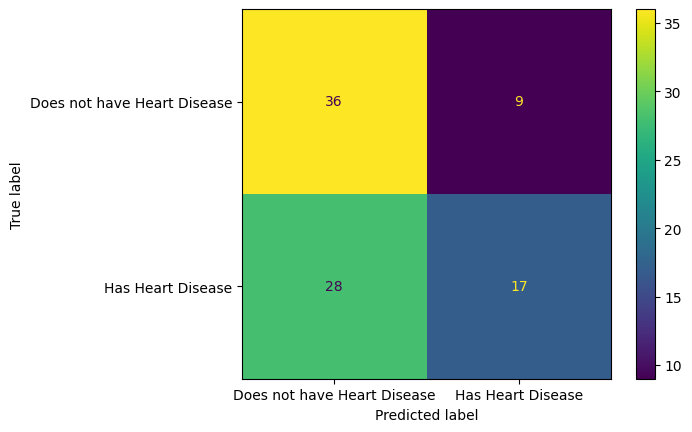

In [46]:
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)

y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

#Check the goodness of fit of the data
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy: ", svc.score(x_train,y_train))
print("Mean Squared Error(MSE): ", mse(y_train,y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy: ", svc.score(x_test,y_test))
print("Mean Squared Error(MSE): ", mse(y_test,y_test_pred))
print()

#Plot the confusion matrix of train set and test set
plot_confusion_matrix(svc, x_test, y_test, display_labels= ['Does not have Heart Disease','Has Heart Disease' ])

From the confusion matrix, **36 + 9 = 45** people that did not have **Heart Disease**, `36( 36/45 = 80%)` were correctly classified. On the other hand, **28 + 17 = 45** people that have **Heart Disease**, `28( 28/45 = 37.78%)` were correctly classified. 
In conclusion, accuracy of predicting people with heart disease is quite low and result of suport vector machine is less satisfying. Hence, abandon this SVC model.

---

## **Conclusion**

Hence, we can conclude that with the variables given in the dataset, we are able to predict up to 80% accuracy using the first three models as to whether a person has heart disease. This could be improved by increasing the size of the given dataset or increase the number of variables in the given dataset. An example would be if your anyone in your family has history of having the disease or ethnic backghround. 